# World Happiness Index Interactive Map

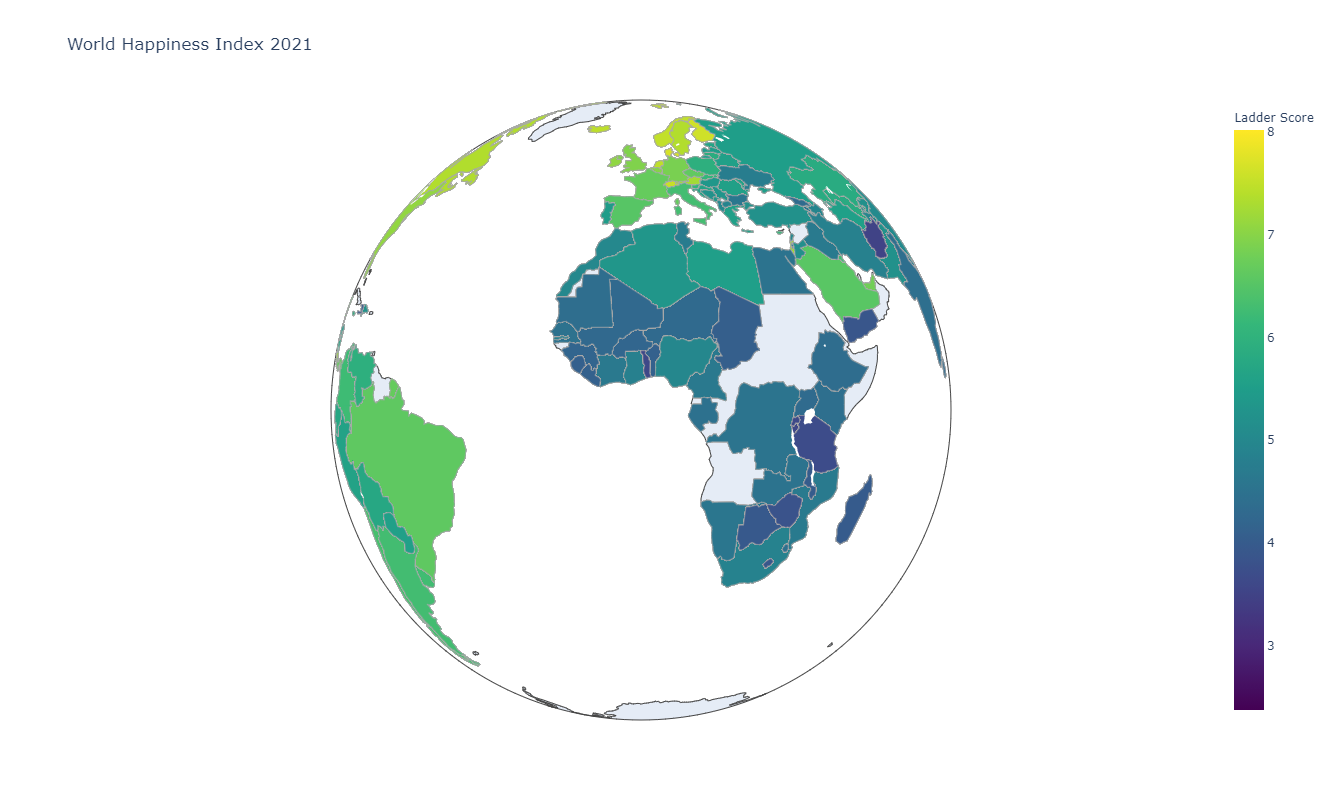

In [4]:
fig.show()

<sub>Cells below must be run first </sub>

In [1]:
import plotly.graph_objects as go
import pandas as pd
import emoji
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

df = pd.read_csv("data/imputed-data.csv")
df['Year'] = df['Year'].astype('int')
country_codes = pd.read_csv("data/country-codes.csv", encoding='ISO-8859-1')
maps_df = pd.merge(country_codes, df, on='Country name', how='right')

# Drop North Cyprus
maps_df = maps_df[maps_df['Country name'] != 'North Cyprus']
maps_df.tail()

maps_df['Emoji'] = maps_df['Status']
emoji_dict = {'Happy': ":grinning_face_with_big_eyes:", 
              'Content': ":neutral_face:",
             'Unhappy': ":sad_but_relieved_face:"}

maps_df.replace({"Emoji": emoji_dict}, inplace=True)

In [2]:
country_texts = []
for i in range(maps_df.shape[0]):
    country = maps_df.iloc[i,:]
    text_annot = f"""
    <b>{country['Country name']}</b> {emoji.emojize(country['Emoji'])}<br>
    Happiness Score: {country['Ladder score']:.2f} <br> <br>
       <i>GDP per Capita</i>: {country['Logged GDP per capita']:.2f} <br>
       <i>Social Support</i>: {country['Social support']:.2f} <br>
       <i>Life Expectancy</i>: {country['Healthy life expectancy']:.2f} <br>
       <i>Generosity</i>: {country['Generosity']:.2f} <br>
       <i>Corruption</i>: {country['Perceptions of corruption']:.2f}
    """
    country_texts.append(text_annot)
    
maps_df['text'] = country_texts

In [3]:
fig = go.Figure(data=go.Choropleth(
    locations = maps_df['Code'],
    locationmode='ISO-3',
    z = maps_df['Ladder score'],
    text = maps_df['text'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Ladder Score',
    hoverinfo='text',
))

fig.update_layout(
    title_text='World Happiness Index 2021',
    autosize=False,
    width=900,
    height=800,
    hoverlabel=dict(
        font_family="monospace",
        ),
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='orthographic'
    ))

from IPython.display import clear_output
clear_output(wait=True)

### Choropleth with Slider
* Running 17 traces of a choropleth map is memory-intensive
* Much better alternative to model it in a BI tool
* Code left below for posterity sake